# Project Prototype 1

In [1]:
# Package importing
import numpy as np
import pandas as pd
from sklearn import preprocessing

import tensorflow as tf

In order to create a neural network using this data, first we have to do a bit more cleaning. The most obvious of which is to encode the categorical data present. In this case the columns that contain categorical data are Type, Category, Content Rating, Genres, and Android Ver. We also want to remove 3 columns from the dataset that are irrelevant to our model. The first is the App column, which only contains the names of the apps. The less obvious one to remove is the Current Ver column, which contains data regarding the current version of every app, which functionally acts as a second name for each app, since apps are likely to use different syntaxes when talking about their versions. Finally, Last Updated needs to be removed since TensorFlow cannot use datetime data.

In [2]:
# Preparing data
df = pd.read_csv('googlePS_cleaned.csv')

# Integer encoding categorical variables
label = preprocessing.LabelEncoder()

df['Type'] = label.fit_transform(df['Type'])
df['Category'] = label.fit_transform(df['Category'])
df['Content Rating'] = label.fit_transform(df['Content Rating'])
df['Genres'] = label.fit_transform(df['Genres'])
df['Android Ver'] = label.fit_transform(df['Android Ver'])

# Removing irrelevant columns
df = df.drop(columns = ['App', 'Current Ver', 'Last Updated'])

df.head(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,0,4.1,159,19.0,10000,0,0.0,1,9,14
1,0,3.9,967,14.0,500000,0,0.0,1,11,14
2,0,4.7,87510,8.7,5000000,0,0.0,1,9,14
3,0,4.5,215644,25.0,50000000,0,0.0,4,9,17
4,0,4.3,967,2.8,100000,0,0.0,1,10,19
5,0,4.4,167,5.6,50000,0,0.0,1,9,7
6,0,3.8,178,19.0,50000,0,0.0,1,9,14
7,0,4.1,36815,29.0,1000000,0,0.0,1,9,17
8,0,4.4,13791,33.0,1000000,0,0.0,1,9,9
9,0,4.7,121,3.1,10000,0,0.0,1,10,14


### Neural Network

In [3]:
# Making training and test data with 80:20 split
seed = 562764589

df_train = df.sample(frac = 0.8, replace = False, random_state = seed)
train_target = df_train.pop('Rating')
df_test = df.drop(df_train.index)
test_target = df_test.pop('Rating')

In [11]:
# Defining our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, input_dim = 9, activation = 'relu'),
    tf.keras.layers.Dense(81, activation = 'relu'),
    tf.keras.layers.Dense(81, activation = 'relu'),
    tf.keras.layers.Dense(9, activation = 'softmax')
])

In [12]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Fitting the model
model.fit(df_train, train_target, epochs=15)

Epoch 1/15
194/194 [==============================] - 0s 565us/step - loss: 73551.3750 - accuracy: 0.0707
Epoch 2/15
194/194 [==============================] - 0s 522us/step - loss: 40346.9023 - accuracy: 0.0724
Epoch 3/15
194/194 [==============================] - 0s 557us/step - loss: 18189.2832 - accuracy: 0.0745
Epoch 4/15
194/194 [==============================] - 0s 564us/step - loss: 9038.9902 - accuracy: 0.0735
Epoch 5/15
194/194 [==============================] - 0s 580us/step - loss: 7932.4204 - accuracy: 0.0702
Epoch 6/15
194/194 [==============================] - 0s 536us/step - loss: 62448.8867 - accuracy: 0.0754
Epoch 7/15
194/194 [==============================] - 0s 570us/step - loss: 14248.7822 - accuracy: 0.0647
Epoch 8/15
194/194 [==============================] - 0s 516us/step - loss: 18671.0020 - accuracy: 0.0654
Epoch 9/15
194/194 [==============================] - 0s 544us/step - loss: 8396.4385 - accuracy: 0.0643
Epoch 10/15
194/194 [============================

In [7]:
test_loss, test_acc = model.evaluate(df_test,  test_target, verbose = True) 

49/49 [==============================] - 0s 531us/step - loss: 20710.1055 - accuracy: 0.0706


We are currently using the Model.evaluate() method from TensorFlow. This method returns the accuracy and loss values of the model, with a larger loss value more indicative of a worse performance. We are evaluating the model with respect to the training dataset, which is 20% of the original dataset that wasn't used to train our model. Our initial prototype has an accuracy of 7.06% and a loss value of 20,000, which is extremely low for our model. This could indicate either that our machine learning model needs tweaking or that our target variable is too difficult to predict with the categories that we presently have. To test if the model itself has issues, we are going to attempt creating a regression model using the same data. 

### Regression Model

In [33]:
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt

For our regression model we

In [74]:
# Data preparation
x = df_train[['Category','Reviews','Size','Installs','Type','Price','Content Rating','Genres','Android Ver']]
y = train_target

In [26]:
# Model creation
reg_model = linear_model.LinearRegression()
reg_model.fit(x, y)

LinearRegression()

In [72]:
# Model validation
predictions = reg_model.predict(df_test)

print('Regression mean absolute erorr:', metrics.mean_absolute_error(test_target, predictions))
print('Regression mean squared error:', metrics.mean_squared_error(test_target, predictions))

Regression mean absolute erorr: 0.3767165620021108
Regression mean squared error: 0.2653521169445043


In [87]:
# Coefficient Table
coefficients = reg_model.coef_
columns = list(x.columns)

coef_table = pd.DataFrame(data = [columns, coefficients])
print(coef_table.head())

          0        1         2         3         4         5               6  \
0  Category  Reviews      Size  Installs      Type     Price  Content Rating   
1  -0.00079      0.0  0.001201       0.0  0.133266 -0.001149        0.005102   

          7            8  
0    Genres  Android Ver  
1 -0.000734     0.003912  


The coefficients of the linear model indicate how much each variable impacts the model's predictions. Using the above table, we can see that Reviews and Installs have no influence on the model's predictions, while the Type of the app has the most influence on the rating of the app. The other variables have extremly little effect on the prediction, so they likely don't add much to the model's performance.

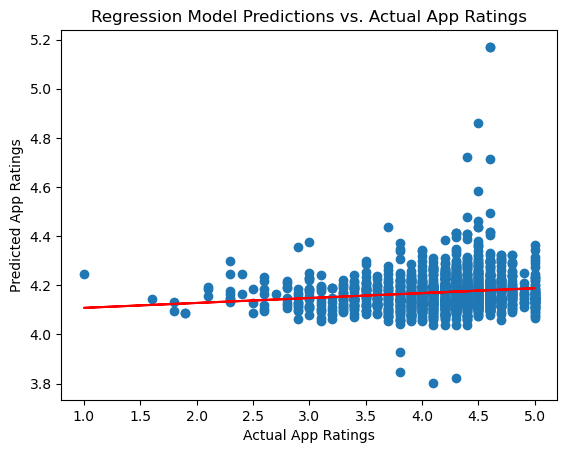

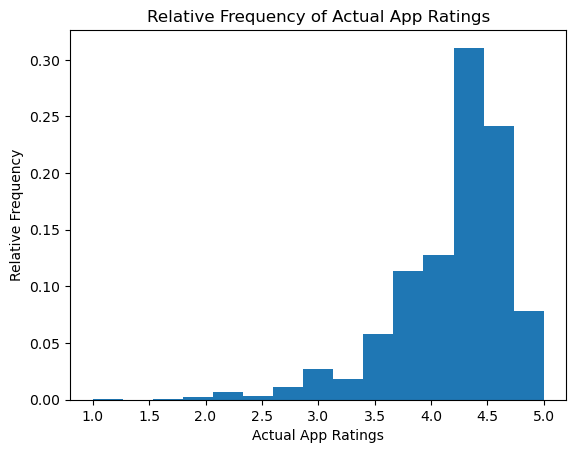

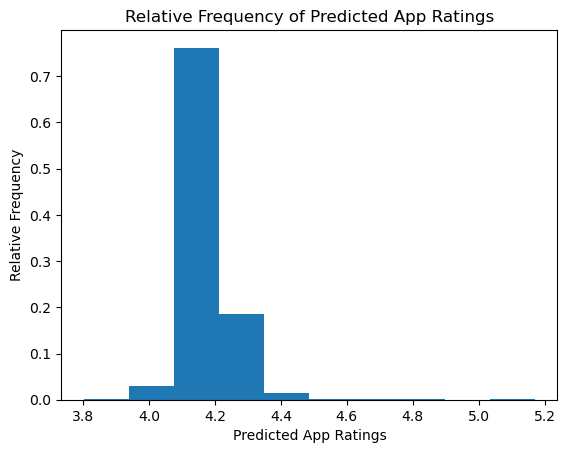

In [55]:
# Plotting regression model
a, b = np.polyfit(test_target, predictions, deg = 1)

plt.scatter(test_target, predictions)
plt.plot(test_target, a*test_target+b, color='red') # line of best fit
plt.xlabel('Actual App Ratings')
plt.ylabel('Predicted App Ratings')
plt.title('Regression Model Predictions vs. Actual App Ratings')
plt.show()

plt.hist(test_target, bins = 15, weights=np.ones_like(test_target) / len(test_target))
plt.xlabel('Actual App Ratings')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Actual App Ratings')
plt.show()

plt.hist(predictions, weights=np.ones_like(predictions) / len(predictions))
plt.xlabel('Predicted App Ratings')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Predicted App Ratings')
plt.show()

We can see that with the linear regression model, the predicted values of the ratings most commonly fell around 4.2 for the ratings of the apps. Although this did lead to a mean squared error of about 26%, we can see that the model is likely just returning 4.2 as a safe default rather than due to data analysis. This can be seen in the two histograms of the predicted vs. actual app ratings, where the predicted ratings do not actually fall below a value of 3.8, and even predict app ratings above 5.0, which is the maximum possible value for apps on the Google Play Store. Because these predictions are so imbalanced, it wouldn't be a smart idea to use this model to predict the ratings of an app, especially since these predictions don't account for the lower possible ratings of apps, which is extremely important for our purposes. If the model itself was more accurate, then we would see a positive linear correlation between the apps in the above scatter plot, but instead we see a mostly flat line centered at 4.2 with our red line of best fit.

## Going Forward

Currently, we are using the Model.evaluate() function in TensorFlow to evaluate our model performance. Using this, we can see that our model in not currently well equipped to deal with any sort of accurate prediction. This type of validation seems to be alright, but I thnk that changing the variable that is being predicted could yield better results. My current ideas for this involves incorporating the number of installs into the success of an app, with an equation along the lines of (Installs * Rating). This is because predicting if an app is highly rated might not matter much of the app doesn't receive many installs in the first place. Additionally, if the app has a high number of installs, then it might not matter if the app has poor reviews which could impact the performance of the app going forward.

I believe that the current version of the project is failing mostly with regards to the model itself. The sequential neural network I chose is likely not ideal for performing this type of prediction, especially since the linear model is much better at predicting app ratings. There is also likely a shortcoming with the dataset itself, which only contains summary data about the apps. While the current dataset can likely determing the average performance for apps within certain categories, more data is going to be required to predict what makes apps perform well. Going forward, I will likely switch to the dataset of user reviews instead, because I have an idea regarding using a neural network to identify common mentions of features or experiences that users mention in their reviews. The dataset includes sentiment analysis of the user reviews, so looking for common features in the positive and negative reviews will likely be able to create better predictions using aspects of the apps that isn't mentioned in the previous dataset.

For displaying my results, I have the most familiarity with creating public websites with WordPress, but Google Sites could also be a valid way for me to create a presentation website.